## CHURN ANALYSIS

### Dataset Info: Sample Data Set containing customer data for a internet service provider company, and showing how long the customers have used there subscription. 

In [38]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

### Load the data file

In [39]:
internet_user_data=pd.read_csv('customer_churn_large_dataset.csv')

### Look at the top 5 records of data

In [40]:
internet_user_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


### Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [41]:
internet_user_data.shape

(100000, 9)

In [42]:
internet_user_data.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [43]:
# Checking the data types of all the columns
internet_user_data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [44]:
# Check the descriptive statistics of numeric variables
internet_user_data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


#### Churn is actually a categorical hence the 25%-50%-75% distribution is not propoer
####  75% customers have subscription length less than 19 months
#### Average Monthly Bill is USD 65.05 whereas 75% customers pay more than USD 82.64 per month
####  Average data usage is 274.39 GB
####  CustomerID statistics are insignificant here.
#### The average age of the customers is 44 years whereas 75% of the people are above 57 years age

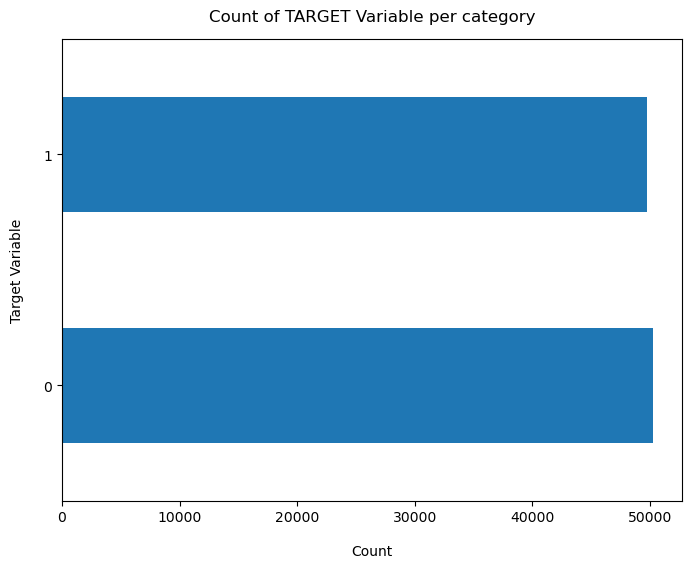

In [45]:
internet_user_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [46]:
100*internet_user_data['Churn'].value_counts()/len(internet_user_data['Churn'])

0    50.221
1    49.779
Name: Churn, dtype: float64

In [47]:
internet_user_data['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

#### - Data is balanced 

In [48]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
internet_user_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


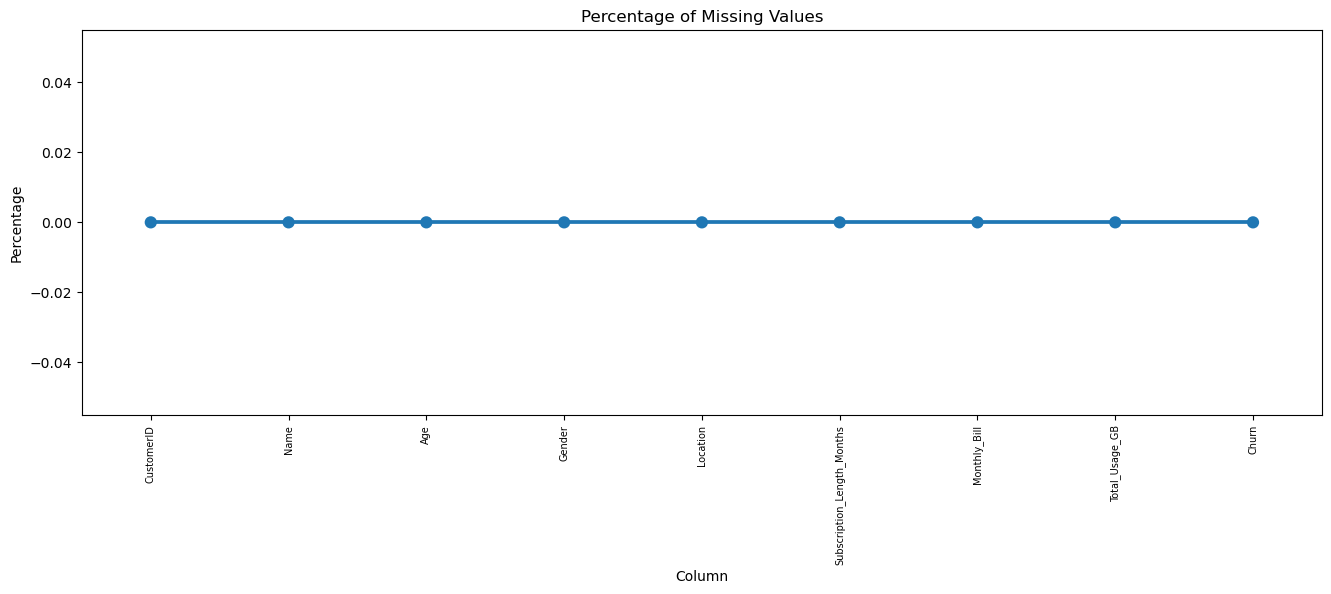

In [49]:
missing = pd.DataFrame((internet_user_data.isnull().sum()) * 100 / internet_user_data.shape[0]).reset_index()
missing.columns = ['Column', 'Percentage']

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.show()


### - Here, we don't have any missing data.

# Data Cleaning

### 1. Create a copy of base data for manupulation & processing

In [50]:
internet_data = internet_user_data.copy()

### 2. Monthly Bill should be numeric amount. Let's convert it to numerical data type

In [51]:
internet_data.Monthly_Bill = pd.to_numeric(internet_data.Monthly_Bill, errors='coerce')
internet_data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

### - There is no missing data

### 3. Divide customers into bins based on Subscription_Length_Months e.g. for  Subscription_Length_Months <  6 months: assign a Subscription_Length_Months group if 1-6, for Subscription_Length_Months between 7 to 12 months,group of 7-12; so on...

In [52]:
# Get the max Subscription_Length_Months
print(internet_data['Subscription_Length_Months'].max()) 

24


In [53]:
# Group the Subscription_Length_Months in bins of 6 months
labels = ["{0} - {1}".format(i, i + 5) for i in range(1, 24, 6)]

internet_data['Subscriptionlength_group'] = pd.cut(internet_data.Subscription_Length_Months, range(1, 30, 6), right=False, labels=labels)

In [54]:
internet_data['Subscriptionlength_group'].value_counts()

1 - 6      25064
19 - 24    25026
7 - 12     24957
13 - 18    24953
Name: Subscriptionlength_group, dtype: int64

### 4. Divide customers into bins based on Age e.g. for Age 18-30 years: assign a group if 18-30, for age between 31 to 50 years,group of 31-50; so on...

In [55]:
# Get the max age
print(internet_data['Age'].max()) 

70


In [56]:
# Group the Age in bins
labels = ["{0} - {1}".format(i, i + 10) for i in range(1, 70, 10)]

internet_data['Age_group'] = pd.cut(internet_data.Age, range(1, 72, 10), right=False, labels=labels)

### 4. Remove columns not required for processing

In [57]:
#drop column customerID, name and Subscription_Length_Months
internet_data.drop(columns= ['CustomerID','Name','Subscription_Length_Months','Age'], axis=1, inplace=True)
internet_data.head()

,Gender,Location,Monthly_Bill,Total_Usage_GB,Churn,Subscriptionlength_group,Age_group
0,Male,Los Angeles,73.36,236,0,13 - 18,61 - 71
1,Female,New York,48.76,172,0,1 - 6,61 - 71
2,Female,Los Angeles,85.47,460,0,1 - 6,21 - 31
3,Female,Miami,97.94,297,1,1 - 6,31 - 41
4,Female,Miami,58.14,266,0,19 - 24,41 - 51


# Data Exploration

### 1. Plot distibution of individual predictors by churn

#### Univariate Analysis

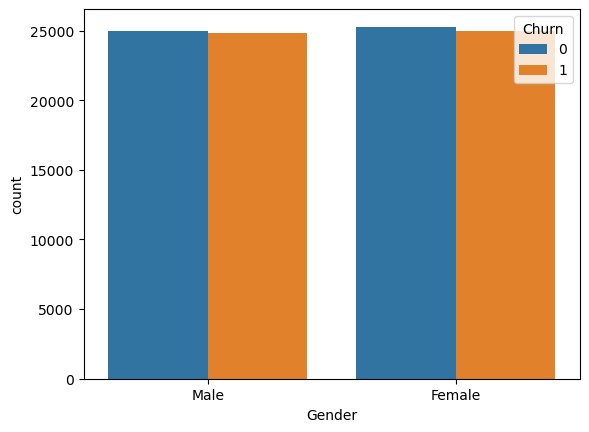

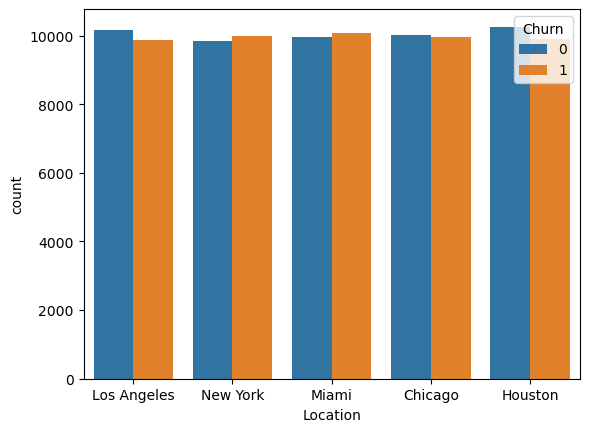

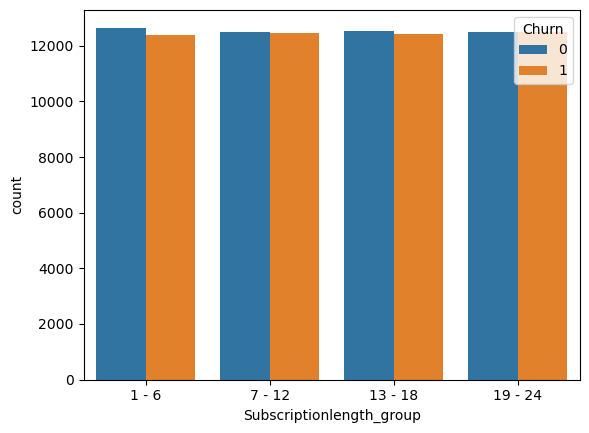

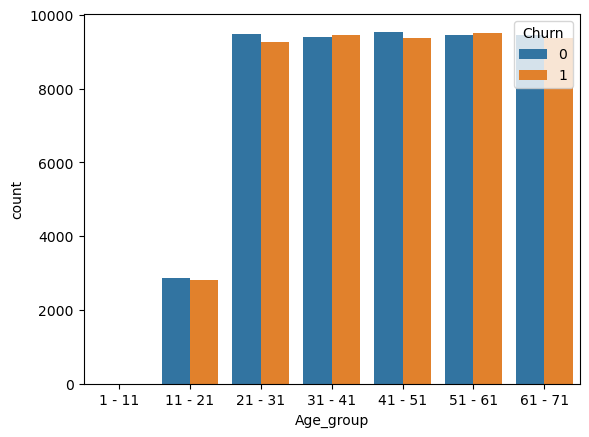

In [58]:
for i, predictor in enumerate(internet_data.drop(columns=['Churn', 'Monthly_Bill', 'Total_Usage_GB'])):
    plt.figure(i)
    sns.countplot(data=internet_data, x=predictor, hue='Churn')

### 2. Convert all the categorical variables into dummy variables

In [59]:
internet_data_dummies = pd.get_dummies(internet_data)
internet_data_dummies.head()

,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,...,Subscriptionlength_group_7 - 12,Subscriptionlength_group_13 - 18,Subscriptionlength_group_19 - 24,Age_group_1 - 11,Age_group_11 - 21,Age_group_21 - 31,Age_group_31 - 41,Age_group_41 - 51,Age_group_51 - 61,Age_group_61 - 71
0,73.36,236,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,48.76,172,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,85.47,460,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,97.94,297,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,58.14,266,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


C:\Users\hp\AppData\Local\Temp\ipykernel_6752\1101918827.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(internet_data_dummies.Monthly_Bill[(internet_data_dummies["Churn"] == 0) ],
C:\Users\hp\AppData\Local\Temp\ipykernel_6752\1101918827.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(internet_data_dummies.Monthly_Bill[(internet_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly Bill by churn')

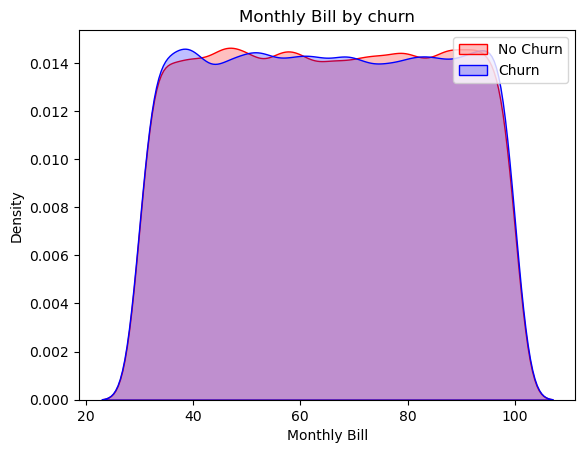

In [61]:
Tot = sns.kdeplot(internet_data_dummies.Monthly_Bill[(internet_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(internet_data_dummies.Monthly_Bill[(internet_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Monthly Bill')
Tot.set_title('Monthly Bill by churn')

### - Surprising insight as monthly bill has no relation with churn

C:\Users\hp\AppData\Local\Temp\ipykernel_6752\1485821585.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot1 = sns.kdeplot(internet_data_dummies.Total_Usage_GB[(internet_data_dummies["Churn"] == 0) ],
C:\Users\hp\AppData\Local\Temp\ipykernel_6752\1485821585.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot1 = sns.kdeplot(internet_data_dummies.Total_Usage_GB[(internet_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'GB Usage by churn')

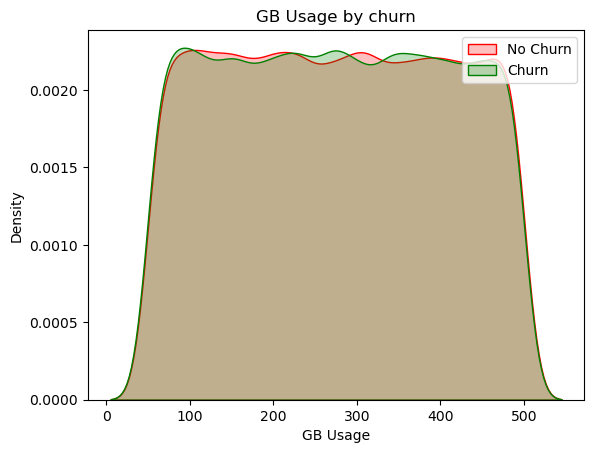

In [62]:
Tot1 = sns.kdeplot(internet_data_dummies.Total_Usage_GB[(internet_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot1 = sns.kdeplot(internet_data_dummies.Total_Usage_GB[(internet_data_dummies["Churn"] == 1) ],
                ax =Tot1, color="Green", shade= True)
Tot1.legend(["No Churn","Churn"],loc='upper right')
Tot1.set_ylabel('Density')
Tot1.set_xlabel('GB Usage')
Tot1.set_title('GB Usage by churn')

### - Surprising insight as Total_Usage_GB also has no relation with churn

## 3.Build a corelation of all predictors with 'Churn'

<Axes: >

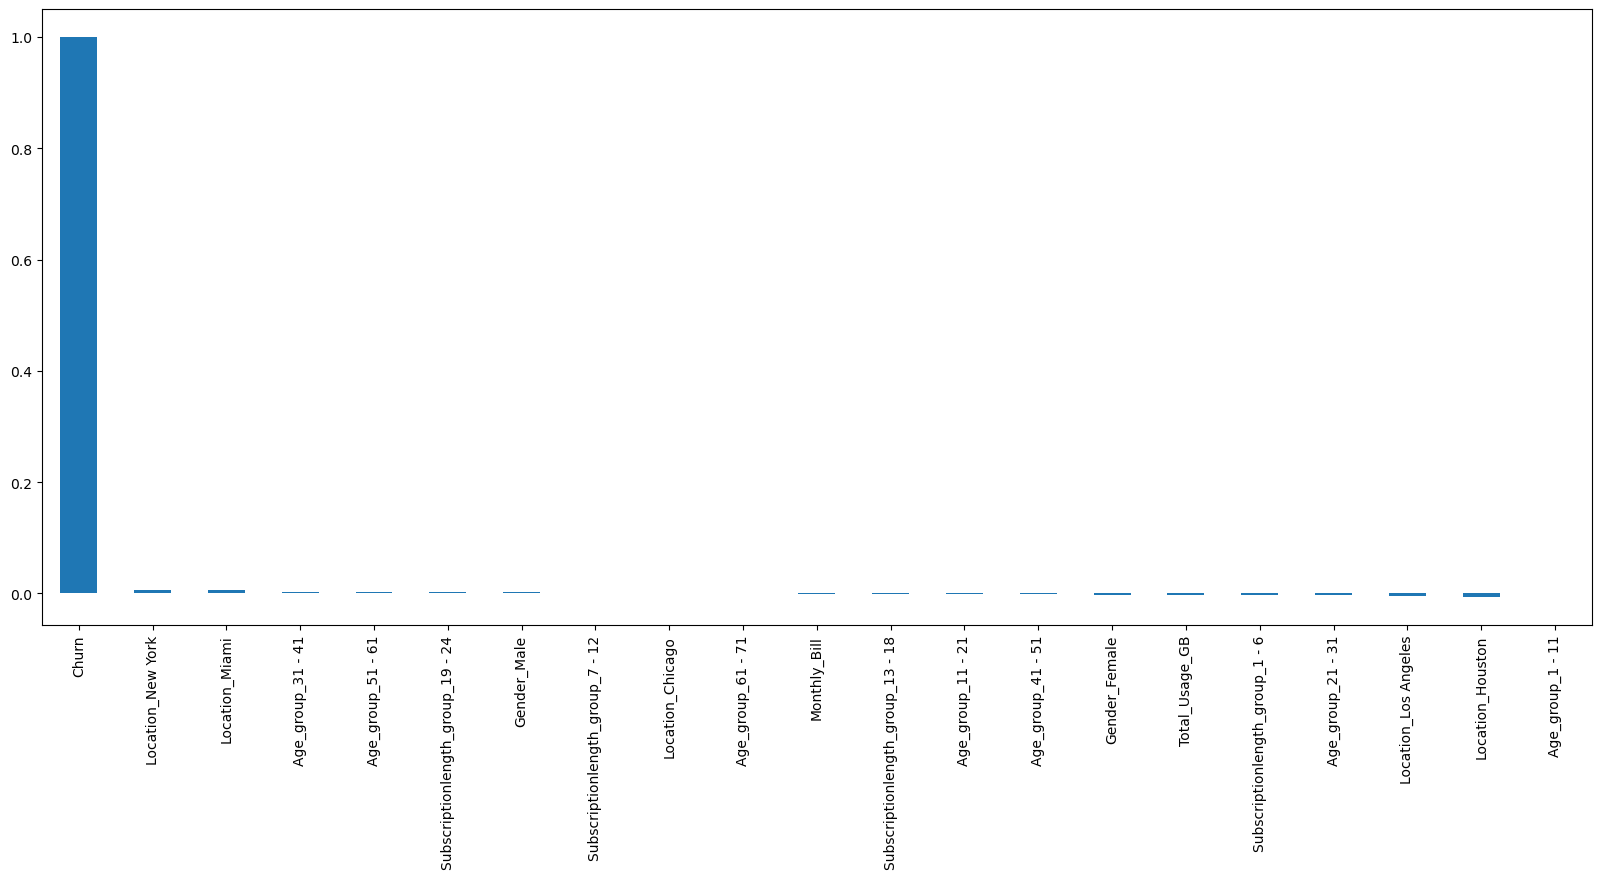

In [63]:
plt.figure(figsize=(20,8))
internet_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

- None of the Factors have alomost NO impact on Churn.
  This is also evident from the Heatmap below

<Axes: >

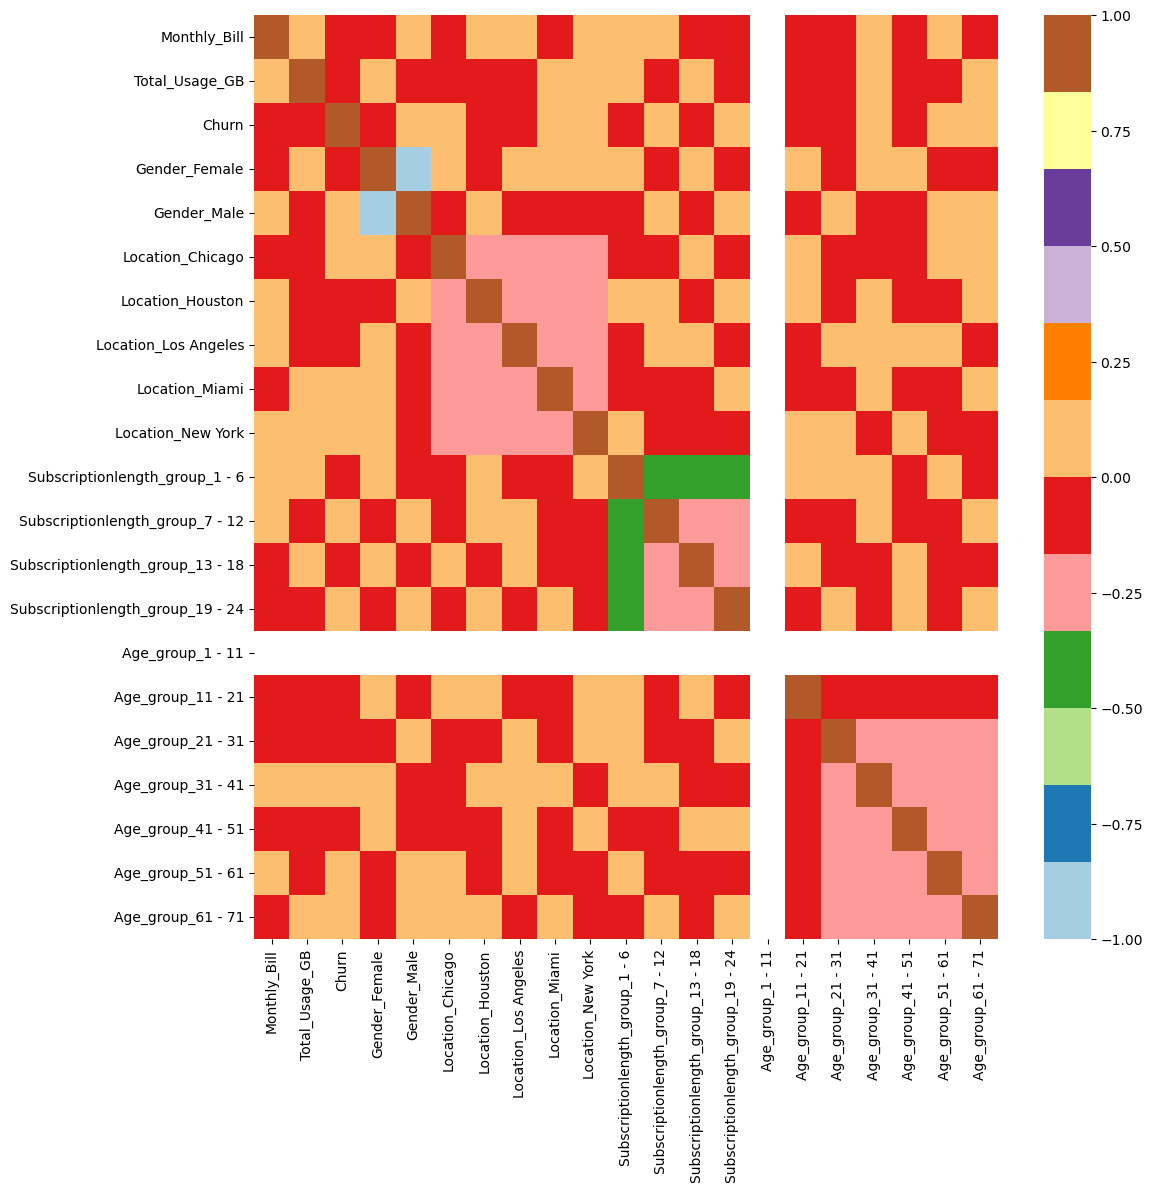

In [64]:
plt.figure(figsize=(12,12))
sns.heatmap(internet_data_dummies.corr(), cmap="Paired")

## Bivariate Analysis

In [65]:
new_df1_target0=internet_data.loc[internet_data["Churn"]==0]
new_df1_target1=internet_data.loc[internet_data["Churn"]==1]

In [66]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

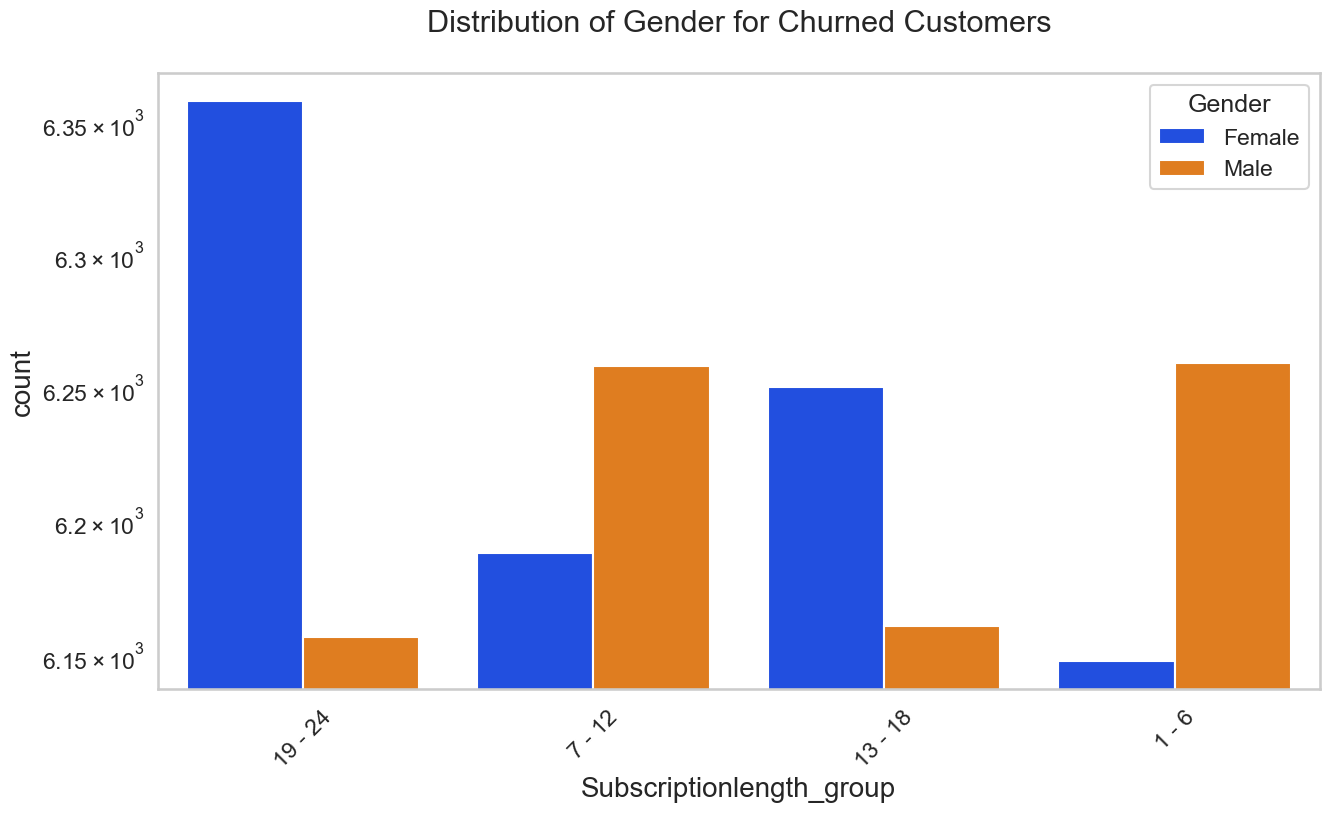

In [69]:
uniplot(new_df1_target1,col='Subscriptionlength_group',title='Distribution of Gender for Churned Customers',hue='Gender')

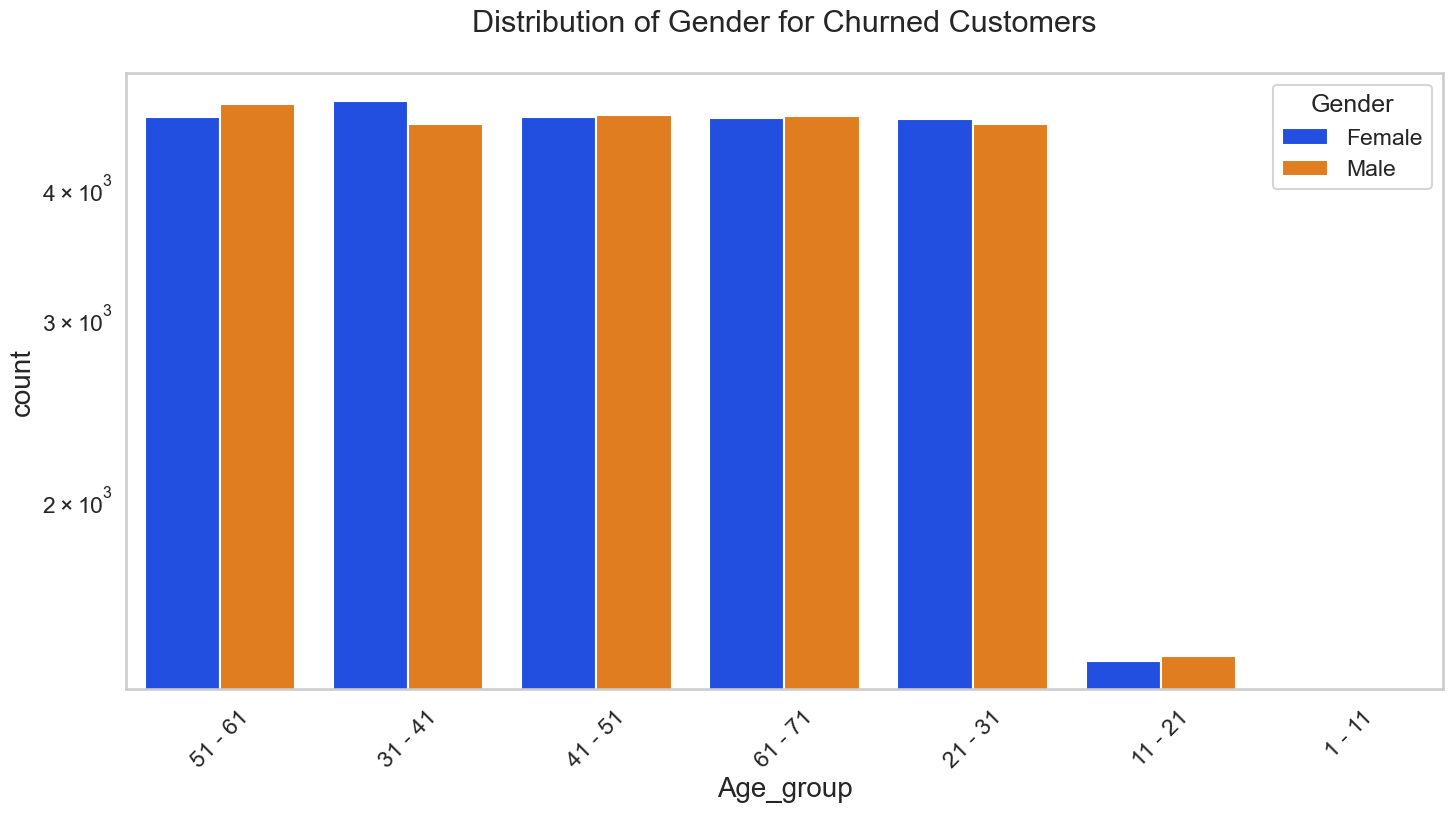

In [70]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Gender for Churned Customers',hue='Gender')

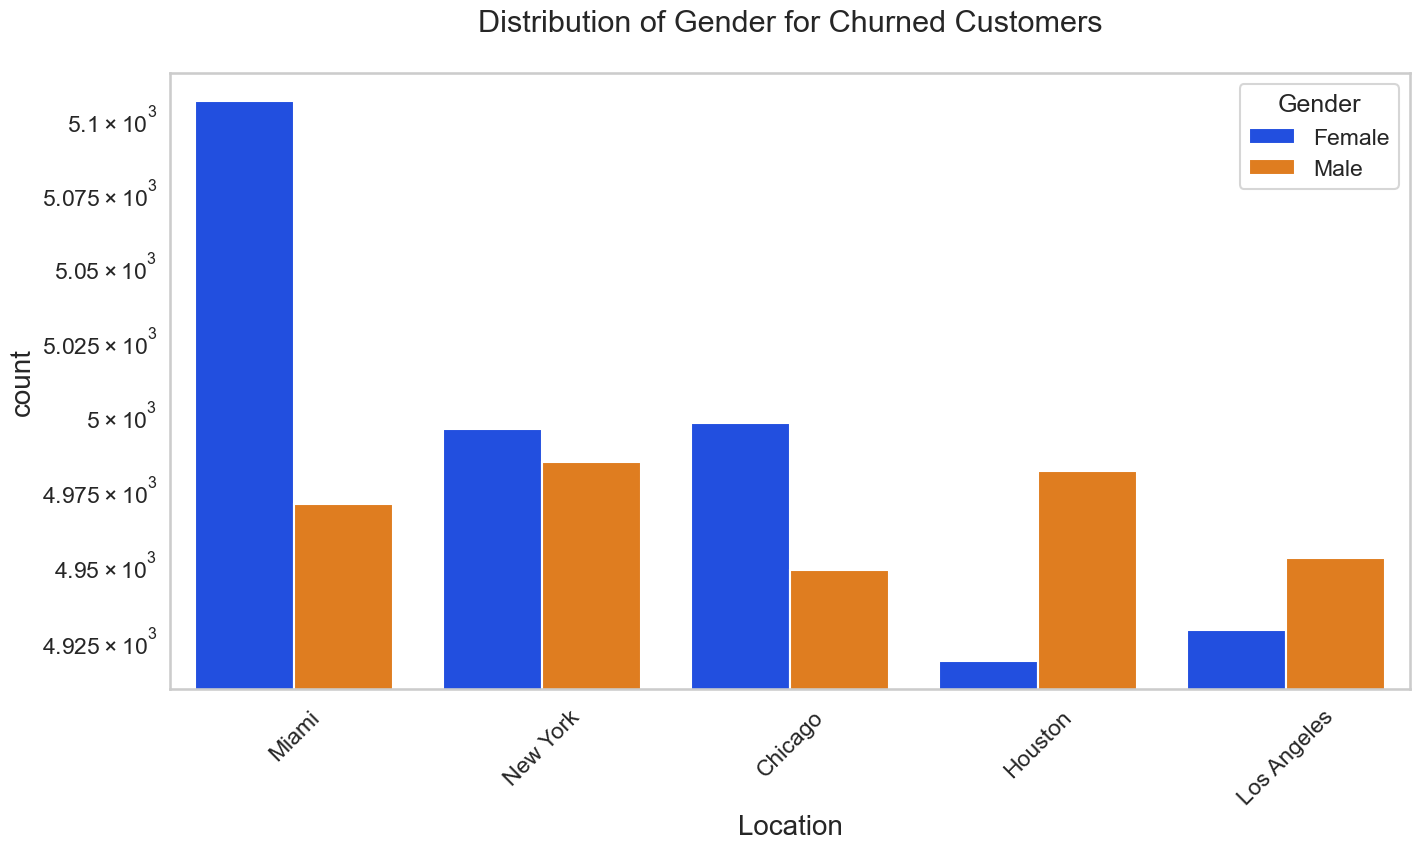

In [71]:
uniplot(new_df1_target1,col='Location',title='Distribution of Gender for Churned Customers',hue='Gender')

### CONCLUSION
1.People having longer subscription duration have high churn rates specially females. 
2. People in the age group below 21 years have very low churn rate.
3. Miami has high churn rate compared to other places.

In [72]:
internet_data_dummies.to_csv('internet_churn.csv')